# SQL for Exploratory Data Analysis by Harshal 

## 1) EDA

### Why explore data?
- help understand the quality of data
- identify missing values
- look for unusual or unexpected values
- look for inconsistent data, especially with regard to business rules
- check distribution of data, its shape
- understand subgroups using histograms
- check correlations between variables,using the Pearson Correlation Coefficient


### Exploring data with statistics
- Central Tendency (Mean, Mode)
- Spread (Bell curve, long tail curve, etc) or Variance, Std Dev

### Testing hypothesis with statistics
- Example: customers over the age of 40 make more purchase than customers over age of 30

`SELECT Avg(number_purchase), Avg(amount_purchase) FROM customer_summary
WHERE age > 40`

------
-----

## 2) Data Quality Checks:

### Why check data?
- Missing values
- values outstides of expected range (Ages less than 0 or greater than 120, etc)
- malformed values (names and descriptions got truncated, date, etc)
- values that violate business rules (order total > customer's credit limit)
- inconsistent values across tables, such as customerID

------

## Types of quality checks:

### i) Missing Values Check:
`SELECT * FROM store_values
WHERE units_sold IS NULL`

### ii) Out of Range Values:
`SELECT * FROM employees
WHERE (age < 0) AND (age > 40)`

`SELECT * FROM store_sales
WHERE employee_shift > 10 OR
employee_shift < 0`

### iii) Inconsistent Data Check:
- Postal code check
- zip code (010-027) are in Massachusetts

### iv) Business Logic:
- check to make sure no enrollees in an insurance plan have enrollment data earlier than date, plan was created
- employee start date can't be earlier than company start date, etc

----

## Imputing Missing Values

- continue without replacing missing values
- define a default value
- compute value based on neighboring rows
    - group rows by some criteria and average value using nearby rows
    - sort rows by some order so that similar rows are next to each other, and then copy the value of missing column from the row before / row after
- compute value based on regression


----

### Identifying Business Logic Checks

- `Date`: reasonable range or not, compare dates, whether future dates are reasonable or not
- `Numeric columns`: range of values are within what would be expected, look for outliers, calculate STDDEV
- `Text`: if categorical => should be small number of distinct values, if largely unique => values should be close to the # of rows in data set, check length and look for unsually long or short ones (check for at least 10 upper/lower outliers)

#### Standard Deviation Check 
- calculate mean of a column
- calculate std dev 
- set upper limit (mean + 3 * std-dev)
- set lower limit (mean - 3t * std-dev)
- any values > or < those limits are outliers

-----
-------

# 3) Calculating Quartiles:

## i) Learn about various distribution of data 
- plot the data series and check normal/left/right skewed)

----


## ii) Check for MInium, Maximum and Median:

`SELECT MIN(age) FROM employees`

`SELECT MIN(age), MIN (start_date), MIN(num_vacation_days)
FROM employees`

`SELECT MAX(age) FROM employees`


## iii) Ordering and Counting

`SELECT age FROM employees
ORDER BY age`

`SELECT age FROM employees
ORDER BY age DESC`

`SELECT age, start_date FROM employees
ORDER BY age, start_date`

`SELECT COUNT(age) FROM employees` # return non null values

###### Mix Aggregrate:
`SELECT COUNT(age), COUNT(start_date), MAX(age), MIN(start_date)
FROM employees`

-------

# 4) Make simple visualization like Histograms:

### 4.1 Partitioning Data using SQL to create histograms:
- we can create bins 
- for example: Annual Insurances cost by ages (we can assume that 6 and 7 years old may have a smiliar cost , 71 and 72 years old may have the similar too).
- we can divide the value by the bin size and `floor` to the whole integer value.

------

![bucket](bucket.png)

----




`SELECT FLOOR(age/5) as bucket FROM insured_persons`

`SELECT FLOOR(age/5) as bucket, FLOOR(age/5) * 5 AS bucket_floor
FROM insured_persons`

![newbucket](newbucket.png)

-------


### 4.2 Calculating Histograms:

`SELECT
FLOOR(age/5) * 5 AS bucket_floor,
AVG(annual_cost)
FROM insured_persons
GROUP BY bucket_floor
ORDER BY bucket_floor`

-----
### 4.3 Simple Histogram Visualization:

#### SQL Repeat Function:
`REPEAT('*', 10): **********`

`CAST (variable AS INTEGER)`

`SELECT
FLOOR(age/5) * 5 AS Bucket_floor, 
AVG(annual_cost),
REPEAT('*', CAST(ROUND(FLOOR(age/5)*5) / 100)) AS INTEGER) AS bar
FROM insured_persons
GROUP BY bucket_floor
ORDER BY bucket_floor`

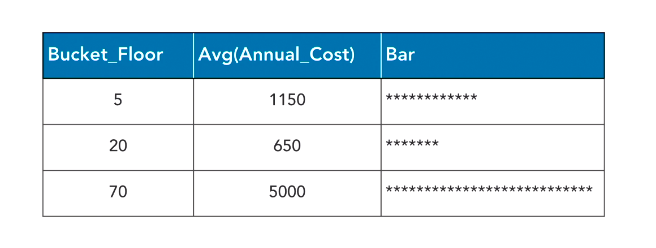



# 5) Checking Correlation between Attributes
- scatter plot (positive , negative correlation, no correlation)


## Calculating correlation with SQL:
- -1: negatively correlated
- +1: positively correlated
- 0: not correlated

#### Positively Correlated:
`SELECT CORR(units_sold, total_revenue)
FROM product_sales`


#### Negatively Correlated:
`SELECT CORR(rooms_booked, rooms_avaliable)
FROM hotel_rooms`

#### Not Correlated:
`SELECT CORR(distance_to_store, amount_spend)
FROM hotel_rooms`